In [1]:
import pandas as pd
import ast

In [2]:
from data.fetch_data import *
from strategies.alphas import *
from utils.ga_utils import *
import warnings
from utils.optimizer import *
from utils.data_utils import * 

warnings.filterwarnings("ignore")

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
train_data = fetch_stock_data("ntpc.NS",'2021-08-01','2023-08-08')
test_data= yf.download("ntpc.NS", start = '2023-08-01',end='2024-02-11')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
def normalize_alphas(column):
    column = column.values.reshape(-1, 1)

    # Create the MinMaxScaler
    scaler = MinMaxScaler()

    # Fit and transform the data
    normalized_column = scaler.fit_transform(column)

    return normalized_column

In [5]:
# pd.DataFrame(normalize_alphas(pd.Series(alpha23(train_data,9)))).hist()
# pd.Series(alpha7(train_data,9)).hist()

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define your dataset
# Assuming you have a dataset X containing features and y containing labels
# For simplicity, I'll create a dummy dataset with one feature (Alpha#1) and binary labels

# Replace X and y with your actual dataset

# Function to compute labels (y)
data = train_data
# data['alpha'] = alpha23(data,5)
data['alpha15'] = alpha14(train_data,3)
# data['alpha3'] = alpha1(data,9)

# data['alpha2'] = alpha15(data, 8,8)
y = compute_labels(data, 0.03, 7)
data=data.drop(["Close","Open","Volume",'High', 'Low', 'Adj Close','alpha','returns'],axis =1 )

data_test = test_data
# data_test['alpha'] = alpha12(data_test, 9)
data_test['alpha15'] =alpha14(train_data,3)

# data_test['alpha2'] = alpha2(data_test, 9)
# data_test['alpha3'] = alpha1(data_test, 9)

# data_test['alpha2'] = alpha15(data_test, 8,8)
y_test = compute_labels(data_test,0.03,7)
data_test=data_test.drop(["Close","Open","Volume",'High', 'Low', 'Adj Close'],axis =1 )



# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=42)

# Initialize the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=43)

# Train the random forest classifier
rf_classifier.fit(data, y)

# Make predictions on the test set
y_pred = rf_classifier.predict(data_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.48091603053435117


In [18]:
rf_classifier.predict([[1000],[233],[10],[-300]])

array([0, 1, 0, 0])

In [19]:
data_test["act"] = y_test
data_test["res"] = y_pred

In [22]:
data_test[data_test.res == 1]
a = len([i for i,j in zip(y_pred,y_test) if i==1 and j==1] )
b = len([i for i in y_pred if i == 1])
print(a,b)


0 0


In [13]:
data_test = test_data
data_test['alpha'] = alpha15(data_test, 8,8)
y_test = compute_labels(data_test,0.03,3)
data_test=data_test.drop(["Close","Open","Volume",'High', 'Low', 'Adj Close'],axis =1 )
data_test

,alpha15,alpha
Date,,
2023-08-01,-376.411892,NaN
2023-08-02,-2.003529,NaN
2023-08-03,-16.296317,NaN
2023-08-04,-5.959700,NaN
2023-08-07,-74.169412,NaN
...,...,...
2024-02-05,NaN,-410.0
2024-02-06,NaN,-397.0
2024-02-07,NaN,-367.0


In [8]:
def compute_labels(data, x_pct, n_days):
    labels = []
    for index, row in data.iterrows():
        row_index = data.index.get_loc(index)  # Get the integer index
        future_prices = data['Close'].iloc[row_index + 1:row_index + n_days + 1]
        price_change = (future_prices / row['Close']) - 1
        if any(price_change >= x_pct):
            labels.append(1)  # Price went up by x_pct or more within next n days
        else:
            labels.append(0)  # Price didn't go up by x_pct within next n days
    return labels

# Example usage
data = train_data
data['alpha'] = alpha14(data, 11, 6)
y = compute_labels(data, 0.02, 3)  # Binary labels (0: Sell, 1: Buy)


<AxesSubplot:>

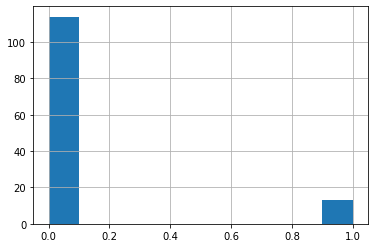

In [50]:
pd.Series(y_pred).hist()

In [12]:
res = pd.read_csv("result_41_62.csv")
res =res.transpose()
res.columns = ['results','best_params','symbol']

for i in res.results:
    j =eval(i)
    print(j['Profit'])

4040.277799222222
3532.9463140754888
1906.0727426254925
299.248046875
299.248046875
0
405.751953125
0
405.751953125
299.248046875
405.751953125
-476.1948590957036


In [13]:
res_p1 = res
res_p1['results'] = res_p1['results'].apply(ast.literal_eval)
res_results = pd.json_normalize(res_p1.results)


In [14]:
res_results.index = res.index

In [15]:
results3 = pd.concat([res,res_results],axis= 1)

In [16]:
master_results = pd.concat([master_results,results3])

In [18]:
master_results.to_csv("master_results.csv",index = True)

In [27]:
master_results.sort_index()

,results,best_params,symbol,Profit,Total Trades,Winning Trades,Strictly Winning Trades,Win Rate,Allocated Funds,Sharpe Ratio
alpha10,"{'Profit': 117.998046875, 'Total Trades': 1, '...","[6, 0.22117188061421367, 0.007745268633672198]",BPCL.NS,117.998047,1,1,1,1.000000,100117.998047,0.000000
alpha10,"{'Profit': 117.998046875, 'Total Trades': 1, '...","[6, 0.22117188061421367, 0.007745268633672198]",BPCL.NS,117.998047,1,1,1,1.000000,100117.998047,0.000000
alpha11,"{'Profit': 299.248046875, 'Total Trades': 113,...","[19, 4, 0.02047798188616179, 0.002407340472964...",BPCL.NS,299.248047,113,53,53,0.469027,108477.636175,0.430437
alpha11,"{'Profit': 299.248046875, 'Total Trades': 113,...","[19, 4, 0.02047798188616179, 0.002407340472964...",BPCL.NS,299.248047,113,53,53,0.469027,108477.636175,0.430437
alpha12,"{'Profit': 405.751953125, 'Total Trades': 73, ...","[6, 0.30220872221166484, 0.011414791287475912]",BPCL.NS,405.751953,73,26,26,0.356164,100626.538852,0.054989
alpha12,"{'Profit': 405.751953125, 'Total Trades': 73, ...","[6, 0.30220872221166484, 0.011414791287475912]",BPCL.NS,405.751953,73,26,26,0.356164,100626.538852,0.054989
alpha14,"{'Profit': 1996.7038038709688, 'Total Trades':...","[11, 6, 0.6782199232936623, 0.9785643772547327]",BPCL.NS,1996.703804,14,8,8,0.571429,105533.788935,0.979025
alpha14,"{'Profit': 1996.7038038709688, 'Total Trades':...","[11, 6, 0.6782199232936623, 0.9785643772547327]",BPCL.NS,1996.703804,14,8,8,0.571429,105533.788935,0.979025
alpha15,"{'Profit': 2717.3703483641657, 'Total Trades':...","[8, 3, 0.7705677341636987, 0.9733180270194676]",BPCL.NS,2717.370348,13,7,7,0.538462,108700.399919,1.804461
alpha15,"{'Profit': 2717.3703483641657, 'Total Trades':...","[8, 3, 0.7705677341636987, 0.9733180270194676]",BPCL.NS,2717.370348,13,7,7,0.538462,108700.399919,1.804461
